## Import and Setting

In [38]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings('ignore')

SEED = 2004


## Preprocessing

### Features

In [39]:
df = pd.read_csv('data/telecom_churn_filled.csv')
df.shape

(7043, 33)

In [40]:
obj_fs = ['Gender',
  'Married',
  'Offer',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Internet Type',
  'Online Security',
  'Online Backup',
  'Device Protection Plan',
  'Premium Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Streaming Music',
  'Unlimited Data',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Customer Status',
  'Churn Category']

num_fs = ['Age',
  'Number of Dependents',
  'Zip Code',
  'Number of Referrals',
  'Tenure in Months',
  'Avg Monthly Long Distance Charges',
  'Avg Monthly GB Download',
  'Monthly Charge',
  'Total Charges',
  'Total Refunds',
  'Total Extra Data Charges',
  'Total Long Distance Charges',
  'Total Revenue']

In [41]:
# encode Customer Status to 1 if churned, 0 if not
df['Customer Status'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)
df['Customer Status'].value_counts()

Customer Status
0    5174
1    1869
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Zip Code                           7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

### Encoding

In [43]:
def encode_categorical(df, fs):
    for f in fs:
        if df[f].dtype == 'object':
            le = LabelEncoder()
            df[f] = le.fit_transform(df[f])
    return df

In [44]:
data = encode_categorical(df.copy(), obj_fs)
data.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category
0,0,37,1,0,93225,2,9,0,1,42.39,...,1,1,65.6,593.30,0.00,0,381.51,974.81,0,3
1,1,46,0,0,91206,0,9,0,1,10.69,...,0,1,-4.0,542.40,38.33,10,96.21,610.28,0,3
2,1,50,0,0,92627,0,4,5,1,33.65,...,1,0,73.9,280.85,0.00,0,134.60,415.45,1,1
3,1,78,1,0,94553,1,13,4,1,27.82,...,1,0,98.0,1237.85,0.00,0,361.66,1599.51,1,2
4,0,75,1,0,93010,3,3,0,1,7.38,...,1,1,83.9,267.40,0.00,0,22.14,289.54,1,2


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   Zip Code                           7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Service                   7043 non-null   int64

### Train, Test Set

In [46]:
y = data['Customer Status']
X = data.drop(columns=['Customer Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 32), (1409, 32), (5634,), (1409,))

In [47]:
y.value_counts(normalize=True), y_test.value_counts(normalize=True)

(Customer Status
 0    0.73463
 1    0.26537
 Name: proportion, dtype: float64,
 Customer Status
 0    0.734564
 1    0.265436
 Name: proportion, dtype: float64)

### Standardization

In [48]:
scaler = StandardScaler()
X_train[num_fs] = scaler.fit_transform(X_train[num_fs])
X_test[num_fs] = scaler.transform(X_test[num_fs])

### Prepare csv files

In [49]:
X_train = X_train.drop(columns=['Churn Category'])
X_test = X_test.drop(columns=['Churn Category'])
X_train.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [50]:
X_train.to_csv('data/X_train.csv', index=False)
X_train_df = pd.read_csv('data/X_train.csv')
X_train_df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,-0.868327,0,1.614852,0.310522,-0.647786,-0.414877,4,1,0.695043,...,2,0,1,0,0.676127,-0.198234,-0.250757,-0.27092,-0.009614,-0.161002
1,0,0.384588,1,2.665802,-1.480025,2.026668,0.810741,2,1,-0.963170,...,2,1,1,1,1.026910,1.199549,-0.250757,-0.27092,-0.383993,0.831464
2,0,0.026612,0,-0.487048,-0.485156,-0.647786,-0.374023,4,1,0.298161,...,2,0,0,0,0.383007,-0.223961,-0.250757,-0.27092,-0.135722,-0.218692
3,0,0.623238,0,-0.487048,-0.738327,-0.647786,-0.905124,0,1,-0.347744,...,2,0,0,0,0.730587,-0.634417,-0.250757,-0.27092,-0.675988,-0.702859
4,1,1.100539,0,-0.487048,-0.951552,-0.647786,-0.700854,4,1,0.395436,...,2,0,1,0,0.344565,-0.526709,-0.250757,-0.27092,-0.369465,-0.526973


In [51]:
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)
y_test_df = pd.read_csv('data/y_test.csv')
y_test_df.head()

,Customer Status
0,1
1,0
2,0
3,0
4,0


## Models

### Basic Models

In [52]:
models = {
    'Logistic Regression': LogisticRegression(random_state=SEED),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=SEED),
    'Random Forest': RandomForestClassifier(random_state=SEED),
    'Extra Trees': ExtraTreesClassifier(random_state=SEED),
    'XGBoost': XGBClassifier(random_state=SEED),
    'LightGBM': LGBMClassifier(random_state=SEED, verbose=-1),
    'Naive Bayes': GaussianNB()
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'AUC': []
}


### ROC AUC

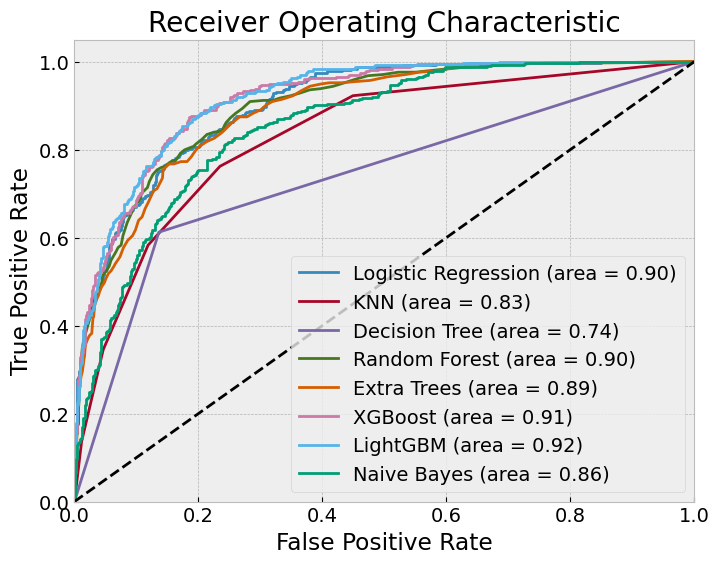

In [53]:
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1'].append(f1_score(y_test, y_pred))
    results['AUC'].append(roc_auc_score(y_test, y_pred_prob))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix

Logistic Regression
[[946  89]
 [129 245]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1035
           1       0.73      0.66      0.69       374

    accuracy                           0.85      1409
   macro avg       0.81      0.78      0.79      1409
weighted avg       0.84      0.85      0.84      1409



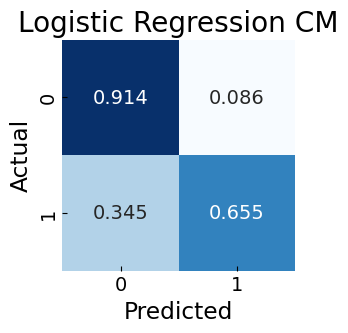

KNN
[[912 123]
 [156 218]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



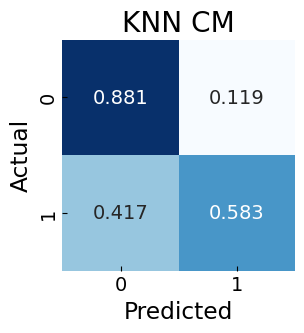

Decision Tree
[[894 141]
 [145 229]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.62      0.61      0.62       374

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



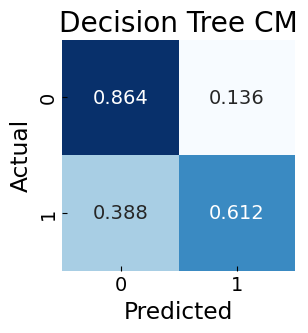

Random Forest
[[966  69]
 [162 212]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1035
           1       0.75      0.57      0.65       374

    accuracy                           0.84      1409
   macro avg       0.81      0.75      0.77      1409
weighted avg       0.83      0.84      0.83      1409



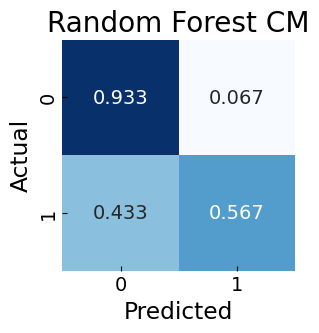

Extra Trees
[[967  68]
 [172 202]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1035
           1       0.75      0.54      0.63       374

    accuracy                           0.83      1409
   macro avg       0.80      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



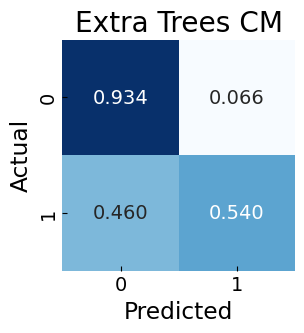

XGBoost
[[962  73]
 [141 233]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1035
           1       0.76      0.62      0.69       374

    accuracy                           0.85      1409
   macro avg       0.82      0.78      0.79      1409
weighted avg       0.84      0.85      0.84      1409



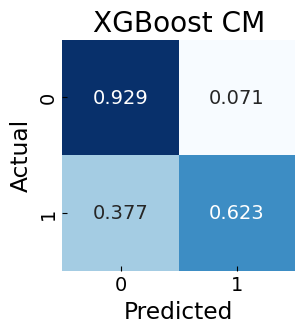

LightGBM
[[960  75]
 [131 243]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1035
           1       0.76      0.65      0.70       374

    accuracy                           0.85      1409
   macro avg       0.82      0.79      0.80      1409
weighted avg       0.85      0.85      0.85      1409



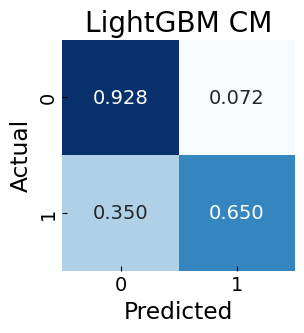

Naive Bayes
[[782 253]
 [ 70 304]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1035
           1       0.55      0.81      0.65       374

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



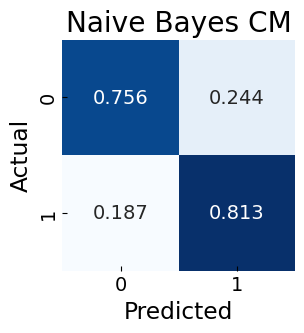

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.845280,0.733533,0.655080,0.692090,0.902697
1,KNN,0.801987,0.639296,0.582888,0.609790,0.830772
2,Decision Tree,0.797019,0.618919,0.612299,0.615591,0.738034
3,Random Forest,0.836054,0.754448,0.566845,0.647328,0.895920
4,Extra Trees,0.829666,0.748148,0.540107,0.627329,0.888541
5,XGBoost,0.848119,0.761438,0.622995,0.685294,0.914689
6,LightGBM,0.853797,0.764151,0.649733,0.702312,0.918412
7,Naive Bayes,0.770759,0.545781,0.812834,0.653061,0.855478


In [54]:
for model_name, model in models.items():
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(model_name)
    print(cm)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} CM')
    plt.grid(False)
    plt.show()

results = pd.DataFrame(results)
results